In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
titanic_test = pd.read_csv('test.csv')
titanic_train = pd.read_csv('train.csv')

In [3]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [5]:
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_train['isFamily'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [8]:
titanic_train['isAlone'] = titanic_train['isFamily'].apply(lambda x: 1 if x==1 else 0)

In [9]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isFamily', 'isAlone'],
      dtype='object')

In [10]:
titanic_train.drop(columns=['SibSp', 'Parch', 'Embarked', 'Cabin', 'Name'])

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,isFamily,isAlone
0,1,0,3,male,22.0,A/5 21171,7.2500,2,0
1,2,1,1,female,38.0,PC 17599,71.2833,2,0
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,1,1
3,4,1,1,female,35.0,113803,53.1000,2,0
4,5,0,3,male,35.0,373450,8.0500,1,1
5,6,0,3,male,28.0,330877,8.4583,1,1
6,7,0,1,male,54.0,17463,51.8625,1,1
7,8,0,3,male,2.0,349909,21.0750,5,0
8,9,1,3,female,27.0,347742,11.1333,3,0
9,10,1,2,female,14.0,237736,30.0708,2,0


In [11]:
median_price = titanic_train['Fare'].median()
mean_price = titanic_train['Fare'].mean()
print(median_price) ; print(mean_price)

14.4542
32.204207968574636


Text(0.5, 1.0, 'Ages')

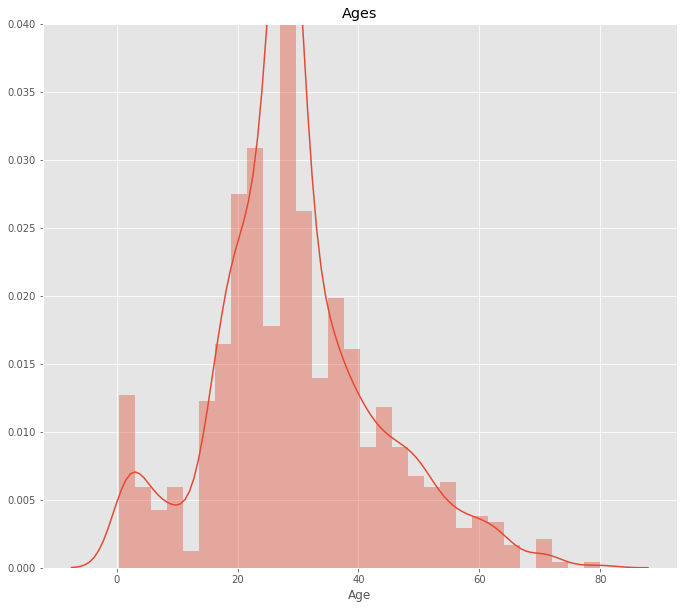

In [12]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0,0.04)
sns.distplot(titanic_train['Age'], bins=30)
ax.set_title('Ages')

In [23]:
titanic_train.loc[titanic_train['Age'] <= 5, 'AgeGroup'] = 1
titanic_train.loc[(titanic_train['Age'] <= 10) & (titanic_train['Age'] > 5), 'AgeGroup'] = 2
titanic_train.loc[(titanic_train['Age'] <= 15) & (titanic_train['Age'] > 10), 'AgeGroup'] = 3
titanic_train.loc[(titanic_train['Age'] <= 20) & (titanic_train['Age'] > 15), 'AgeGroup'] = 4
titanic_train.loc[(titanic_train['Age'] <= 30) & (titanic_train['Age'] > 20), 'AgeGroup'] = 5
titanic_train.loc[(titanic_train['Age'] <= 35) & (titanic_train['Age'] > 25), 'AgeGroup'] = 6
titanic_train.loc[(titanic_train['Age'] <= 40) & (titanic_train['Age'] > 30), 'AgeGroup'] = 7
titanic_train.loc[(titanic_train['Age'] <= 45) & (titanic_train['Age'] > 35), 'AgeGroup'] = 8
titanic_train.loc[(titanic_train['Age'] <= 50) & (titanic_train['Age'] > 40), 'AgeGroup'] = 9
titanic_train.loc[(titanic_train['Age'] <= 55) & (titanic_train['Age'] > 45), 'AgeGroup'] = 10
titanic_train.loc[(titanic_train['Age'] <= 60) & (titanic_train['Age'] > 50), 'AgeGroup'] = 11
titanic_train.loc[(titanic_train['Age'] <= 65) & (titanic_train['Age'] > 55), 'AgeGroup'] = 12
titanic_train.loc[(titanic_train['Age'] <= 70) & (titanic_train['Age'] > 60), 'AgeGroup'] = 13
titanic_train.loc[(titanic_train['Age'] <= 75) & (titanic_train['Age'] > 65), 'AgeGroup'] = 14
titanic_train.loc[(titanic_train['Age'] <= 80) & (titanic_train['Age'] > 70), 'AgeGroup'] = 15
titanic_train.loc[(titanic_train['Age'] <= 85) & (titanic_train['Age'] > 75), 'AgeGroup'] = 16


16

In [24]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 1, 'female': 0})

In [25]:
titanic_train = titanic_train.drop(columns=['PassengerId'])

In [26]:
titanic_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isFamily,isAlone,AgeGroup
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S,1,1,6.0
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S,1,1,4.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,NaN,S,4,0,6.0
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,1,1,6.0
890,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,1,1,7.0


In [27]:
X = titanic_train.drop(['Survived', 'Embarked', 'Age','Name', 'Cabin', 'Ticket', 'Parch', 'SibSp'], axis=1)
y = titanic_train['Survived']
X.shape, y.shape
X_array = np.array(X).copy()
y_array = np.array(y).copy()

In [28]:
print(X)

     Pclass  Sex      Fare  isFamily  isAlone  AgeGroup
0         3    1    7.2500         2        0       5.0
1         1    0   71.2833         2        0       8.0
2         3    0    7.9250         1        1       6.0
3         1    0   53.1000         2        0       7.0
4         3    1    8.0500         1        1       7.0
5         3    1    8.4583         1        1       6.0
6         1    1   51.8625         1        1      11.0
7         3    1   21.0750         5        0       1.0
8         3    0   11.1333         3        0       6.0
9         2    0   30.0708         2        0       3.0
10        3    0   16.7000         3        0       1.0
11        1    0   26.5500         1        1      12.0
12        3    1    8.0500         1        1       4.0
13        3    1   31.2750         7        0       8.0
14        3    0    7.8542         1        1       3.0
15        2    0   16.0000         1        1      11.0
16        3    1   29.1250         6        0   

In [33]:
model_svm = SVC(kernel='linear', C=1, gamma='auto')
score = cross_val_score(model_svm, X_array, y_array, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(score)

0.7923161389172625


In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X_array, y_array, test_size=.3)

In [35]:
stand_scaler = StandardScaler()
xtrain = stand_scaler.fit_transform(xtrain)
xtest = stand_scaler.fit_transform(xtest)
model_svm.fit(xtrain, ytrain)
y_prediction = model_svm.predict(xtest)
print(accuracy_score(ytest, y_prediction))

0.7835820895522388
